In [2]:

from collections import defaultdict,Counter
from tqdm import tqdm
import numpy as np
import re
import os
import pickle
import matplotlib.pyplot as plt
from datetime import datetime 
date_format_str = '%m/%d/%Y %I:%M:%S %p'

In [3]:
news_path = "/home/v-mezhang/blob/data/large/train_valid/news.tsv"

In [17]:
cat_count = {}
subcat_count = {}
news_dict = {}
subcat_list = defaultdict(list)

for l in tqdm(open(news_path, "r", encoding='utf-8')):
    nid, vert, subvert, title, abst, url, ten, aen = l.strip("\n").split("\t")
    if nid not in news_dict:
        news_dict[nid] = l
        if vert not in cat_count:
            cat_count[vert] = 1
        else:
            cat_count[vert] += 1
        subcat_list[subvert].append(nid)
        if subvert not in subcat_count:
            subcat_count[subvert] = 1
        else:
            subcat_count[subvert] += 1

173550it [00:00, 264613.07it/s]


In [20]:
cand_news_file = "/home/v-mezhang/blob/data/large/train_valid/cand_news.tsv"

subcat_set = []
num_news = 0

with open(cand_news_file, 'w', encoding='utf-8') as file:
    for key, value in subcat_count.items():
        if value > 200 and key not in set(subcat_set):
            subcat_set.append(key)
            
            sample_list = np.random.choice(subcat_list[key], replace=False, size = 200)
            for nid in sample_list:
                file.write(news_dict[nid])
                num_news+=1
        if num_news % 1000 == 0:
            print(num_news)

    
len(subcat_set)

1000
2000
2000
3000
4000
4000
4000
5000
5000
6000
6000
7000
8000
8000
9000
9000
9000
9000
9000
9000
9000
9000
9000
10000
10000
11000
11000
11000
11000
11000


57

In [21]:
num_news

11400

(array([265.,  11.,   6.,   1.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([1.00000e+00, 1.48820e+03, 2.97540e+03, 4.46260e+03, 5.94980e+03,
        7.43700e+03, 8.92420e+03, 1.04114e+04, 1.18986e+04, 1.33858e+04,
        1.48730e+04]),
 <BarContainer object of 10 artists>)

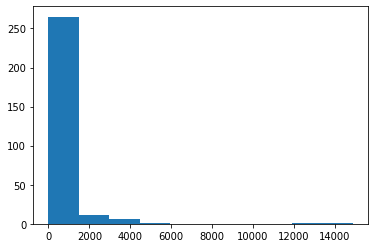

In [9]:
plt.hist(list(subcat_count.values()))

In [ ]:
data_path = "/home/v-mezhang/blob/data/large/train_valid/behaviors.tsv"
valid_data_path = "/home/v-mezhang/blob/data/large/train_valid/behaviors-valid.tsv"

In [ ]:
valid_user_count = {}

for l in tqdm(open(valid_data_path, "r")):
    imp_id, uid, t, his, imprs = l.strip("\n").split("\t")
    if uid not in valid_user_count:
        valid_user_count[uid] = 0
    else:
        valid_user_count[uid] += 1

In [ ]:
len(valid_user_count)

In [ ]:
len(valid_user)

In [ ]:
user_his = {}
user_count = {}

for l in tqdm(open(data_path, "r")):
    imp_id, uid, t, his, imprs = l.strip("\n").split("\t")
    his = his.split()
    if uid not in user_his:
        user_his[uid] = len(his)

    if uid not in user_count:
        user_count[uid] = 0
    else:
        user_count[uid] += 1

In [ ]:

plt.hist(list(user_his.values()))

In [ ]:
plt.hist(list(user_count.values()))

In [ ]:
temp = 0
total_imprs = 0 
valid_high_part_uids = []

for key, i in user_count.items():
    if key in valid_user_count and i >= 15 and user_his[key] >= 50:
        temp+= 1
        total_imprs += int(i)
        valid_high_part_uids.append(key)

In [ ]:
temp

In [ ]:
total_imprs

In [ ]:
selected_users = np.random.choice(valid_high_part_uids, replace=False, size = 1000)

In [ ]:
selected_users

In [ ]:
with open("/home/v-mezhang/blob/data/large/train_valid/selected_users.pkl", "wb") as f:
        pickle.dump(selected_users, f)

In [ ]:
np.save("/home/v-mezhang/blob/data/large/train_valid/selected_users", selected_users)

In [ ]:
selected_users = np.load("/home/v-mezhang/blob/data/large/train_valid/selected_users.npy")

In [ ]:
len(selected_users)

In [ ]:
save_file = "/home/v-mezhang/blob/data/large/train_valid/valid_high_part_user_behaviors.tsv"

with open(save_file, 'wb') as file:
    for l in tqdm(open(data_path, "r")):
        print(l)
        imp_id, uid, t, his, imprs = l.strip("\n").split("\t")
        his = his.split()
        if uid in high_part_uids:
            file.write(l)
            print(uid)
        